Second Personal Project on ML Classification
This is a classification project using KNN and SVM Algorithm to
Classify Banking CreditCard transactional records as either fraudulent or legitimate
Project done without supervision - only pure desire and keeping track record
by Blibo Albert @bliboalbert <- github && LinkedIn

In [1]:
# In this project I will train two powerful machine learning algorithms to classify
# creditcard transactions as either legitimate {class 0} or fraudulent {class 1}
# K Nearest Neighbor algorithm and Support Vector Machine Algorithm is used to train the models
# Datasets used in this project were downloaded from kaggle.com {one powerful data aggregator}

Project @2a
KNN - K-Nearest Neighbor Classifier

In [2]:
# K-Nearest Neighbor Classifier
# KNN works on the intuition of predicting the class in which a datapoint will fall when it is near
# already predicted class of datapoints
# KNN uses either euclidian distance or manhatan distance or cosine distance to determine the class in
# which a new datapoint will fall
# It is either the new datapoint's distance is very close to a particular neighbor
# Or the new datapoint is close to K neighbors of one class than the other
# KNN is a lazy learning approach since you always have to query the model before...

Data access, Data Analysis and Preprocessing

In [5]:
# import important sklearn and SciPy libraries

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
# Access dataset for preprocessing and analysis

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# some info about dataset
observation = len(data.index)
features = len(data.columns)
print('There are {} observations and {} features in the dataset.'.format(observation, features))

There are 284807 observations and 31 features in the dataset.


In [4]:
# The dataset has already been normalize, thus from V1 to V28 we see the normalization of the dataset
# We can go ahead and extract features for our training
# our target is the column named class, which consist of a class group of 0s and 1s

In [5]:
# how many 0s and 1s are there? thus is our target datapoints balanced for a better training?
class_size = data.Class.value_counts().values
print('Unbalanced Data: There are {} Class 0s and {} class 1s.'.format(class_size[0], class_size[1]))

Unbalanced Data: There are 284315 Class 0s and 492 class 1s.


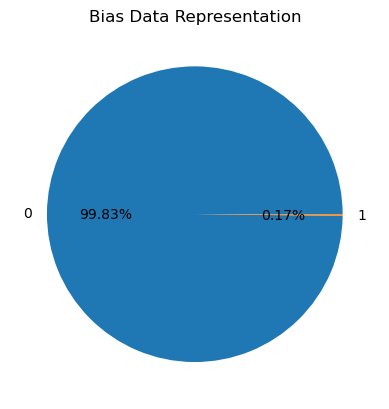

In [8]:
# data bias visuals with pie chart
target = data.Class.unique()
size = data.Class.value_counts().values
fig, ax = plt.subplots()
ax.pie(size,labels=target, autopct='%.2f%%')
ax.set_title('Bias Data Representation')
plt.show()

In [17]:
# extracting feature matrix and response vector or target from data dataframe
X = data.iloc[:, 1:-1]
y = data.iloc[:,-1]

In [27]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [18]:
# Train / Test datasets
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=.33, random_state=44)

In [9]:
# Care is taken to incomporate the unbalanced dataset in the training/fitting of the model
# to ensure the model is biased toward the data class that is more (the 0 class)
# in other to combat this, we compute the class weight to normalize the target variable
# this will be use in the training of the model to make it bias towards the less datapoints


In [14]:
from sklearn.utils.class_weight import compute_sample_weight

In [19]:
class_w = compute_sample_weight('balanced', y_train)

In [23]:
# train model, knn_model = KNeighborsClassifier()
# with hyperparameter tuning :- weight, n_neighbors=4, n_jobs=10
knn_model = KNeighborsClassifier(n_neighbors=4, n_jobs=10, weights='uniform')
knn_model.fit(X_train, y_train)
knn_model

KNeighborsClassifier(n_jobs=10, n_neighbors=4)

In [24]:
# make inferences and evaluate model
knn_train_pred = knn_model.predict(X_train)
knn_train_pred[:5]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, 0, 0], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score
print('Train Accuracy: {0:.2f}'.format(accuracy_score(y_train, knn_train_pred)))

Train Accuracy: 1.00


In [26]:
knn_test = knn_model.predict(X_test)
print('Test Accuracy: {0:.2f}'.format(accuracy_score(y_test, knn_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test Accuracy: 1.00


In [32]:
#for ids, cl in enumerate(knn_test):
 #   if cl == 0:
 #       count = 0
  #      print('Legitimate Transaction! class is {}.'.format(cl))
  ##     if count == 10:
          #  break
   # else:
       # print('Fraudulent Transaction! class is {}.'.format(cl))

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, knn_test, labels=[0,1])
cm_train = confusion_matrix(y_train, knn_train_pred, labels=[0,1])
c_report = classification_report(y_test, knn_test)

In [39]:
print(cm)
print('\n')
print(cm_train)
print(c_report)

[[93822     4]
 [   69    92]]


[[190478     11]
 [   105    226]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93826
           1       0.96      0.57      0.72       161

    accuracy                           1.00     93987
   macro avg       0.98      0.79      0.86     93987
weighted avg       1.00      1.00      1.00     93987



In [46]:
# confusion matrix for knn model testing evaluation
import itertools

def plot_confusion_mat(cm, classes, normalize=False, title='<-Confusion Matrix->', cmap=plt.cm.Spectral):
    '''This function plots the confusion as either normalized or not normalized
    You can set the parameter normalize to True to plot confusion matrix in normalize mode'''
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Confusion Matrix Normalized')
    else:
        print('Confusion Matrix without Normalization')
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_mark = np.arange(len(classes))
    plt.xticks(tick_mark, classes, rotation=45)
    plt.yticks(tick_mark, classes)
    plt.colorbar()
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2
    
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if thresh > cm[i,j] else 'black')
    plt.tight_layout()
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.show()
        
    

Confusion Matrix without Normalization
[[93822     4]
 [   69    92]]


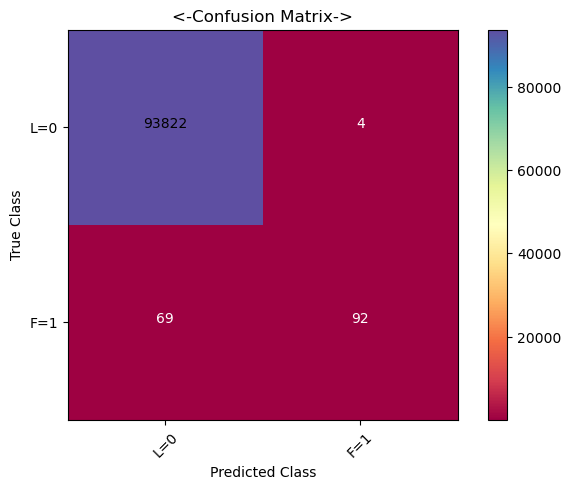

In [51]:
# confusion matrix without normalization for test model evaluation
plt.figure
plot_confusion_mat(cm, classes=['L=0', 'F=1'])

Confusion Matrix Normalized
[[9.99957368e-01 4.26321062e-05]
 [4.28571429e-01 5.71428571e-01]]


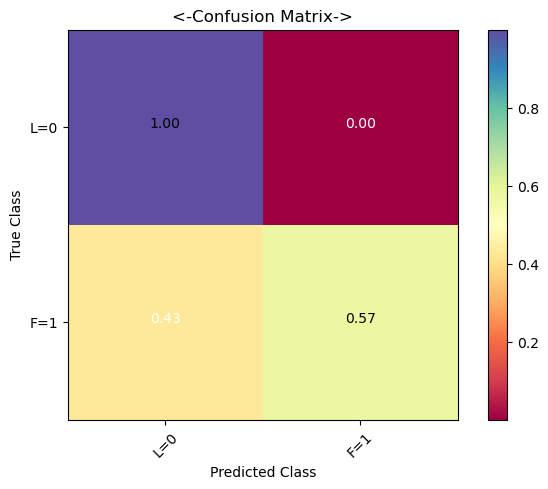

In [50]:
# confusion matrix normalized for test model evaluation
plt.figure
plot_confusion_mat(cm, normalize=True, classes=['L=0', 'F=1'])

Confusion Matrix Normalized
[[9.99942254e-01 5.77461166e-05]
 [3.17220544e-01 6.82779456e-01]]


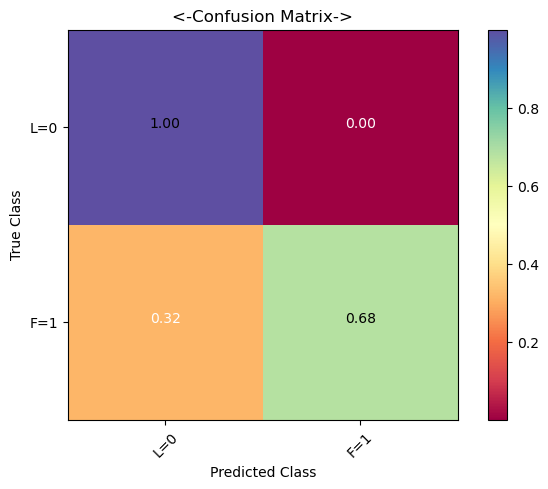

In [49]:
# confusion matrix normalized for train model evaluation
plt.figure
plot_confusion_mat(cm_train, normalize=True, classes=['L=0', 'F=1'])

In [52]:
# conclusion on KNN model for accuracy and precision
# looking at the confusion matrix, the model is able to predict all negative cases {class = 0}
# as 0 but predicted only 57% for test data and 68% for train data
# this is bad for our model hence further hyperparameter tuning is required for our model to function
# well, thus to prevent overfitting of the model.

Support Vector Machine Algorithm Classification 

In [53]:
# Support Vector Machine employs kerneling; a technique of mapping data to a high-dimensional space
# using kernel functions to create a hyperplane as a separator to separate a linearly unseparable data
# This hyperplane separates the target into classes which can further be classified by
# the decision boundary equation
# the output of svm is either a 0 or 1 for a binary classification
# or a one-vs-rest approach for multiclass classification
# svm does not predict probability for the outputs

In [66]:
# SVM model instant and preprocessing
svm_model = LinearSVC(C=0.01, class_weight='balanced', random_state=45, loss='hinge', max_iter=3000)
# hyperparameter tuning helps to prevent overfitting

In [74]:
# features matrix, response vector and preprocessing
X = data.iloc[:, 1:30]
y = data.iloc[:,30]
X = preprocessing.StandardScaler().fit(X).transform(X)
X = preprocessing.normalize(X, norm='l1')

In [75]:
# train / test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30, random_state=45)

In [81]:
# train model and evaluate
class_w = compute_sample_weight('balanced', y_train)
svm_model.fit(X_train, y_train)
yhat = svm_model.predict(X_train)

In [82]:
train_df = pd.DataFrame(y_train)
train_df['predict'] = yhat
train_df.head()

,Class,predict
158708,0,0
188612,0,0
191155,0,0
203206,0,0
10913,0,0


In [85]:
# Evaluation of train model
from sklearn.metrics import log_loss, jaccard_score
train_loss = log_loss(y_train, yhat)
train_ja = jaccard_score(y_train, yhat, pos_label=0)

In [86]:
print(train_loss, train_ja)

0.8211992326447138 0.9761892801527101


In [87]:
## how does class weight computed affect fitting of model

In [88]:
# Evaluation of test model
yhat_test = svm_model.predict(X_test)
test_df = pd.DataFrame(y_test)
test_df['predict'] = yhat_test
test_df.head()

,Class,predict
11783,0,0
199531,0,1
226972,0,0
229378,0,0
101019,0,0


In [89]:
test_loss = log_loss(y_test, yhat_test)
test_ja = jaccard_score(y_test, yhat_test, pos_label=0)
print('[Test Evaluation Score]: Logloss {0:.2f}, Jaccard Index {0:.2f}'.format(test_loss, test_ja))

[Test Evaluation Score]: Logloss 0.84, Jaccard Index 0.84


In [92]:
# Confusion matrix for SVM test model evaluation
cm_svm = confusion_matrix(y_test, yhat_test, labels=[0,1])
print(cm_svm)

[[83224  2054]
 [   14   151]]


Confusion Matrix without Normalization
[[83224  2054]
 [   14   151]]


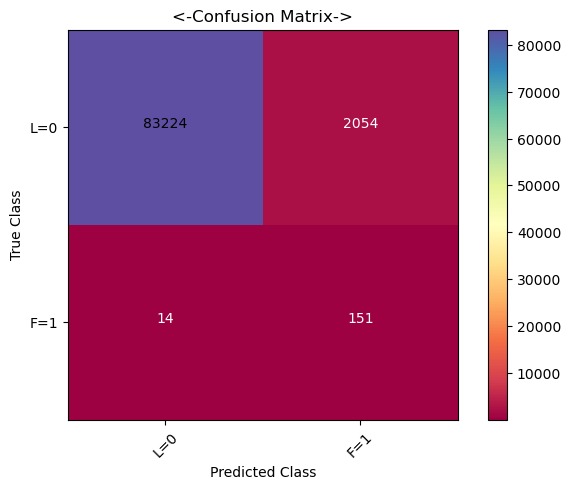

In [93]:
# confusion matrix normalized for test model evaluation
plt.figure
plot_confusion_mat(cm_svm, classes=['L=0', 'F=1'])

Confusion Matrix Normalized
[[0.97591407 0.02408593]
 [0.08484848 0.91515152]]


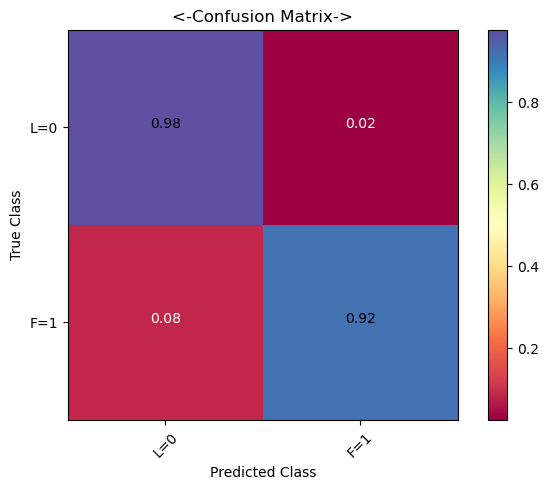

In [91]:
# confusion matrix normalized for test model evaluation
plt.figure
plot_confusion_mat(cm_svm, normalize=True, classes=['L=0', 'F=1'])

In [94]:
# Conclusion on SVM model
# interpreting the confusion matrix:
# our svm model did better than knn, and this is because of the standardisation and hyperparameters 
# applied to the fitting the model
# svm_model predicted 98% of class 0, L=0 as true and 92% of class 1, F=1 as true
# compare to knn_model's ~1.0% and 68% respectively

End of Classification Project

In this particular project, I obtained creditcard transaction of a certain bank

From Kaggle.com to train SVM and KNN models to predict which transactions are legitimate or Fraudulent

By Blibo Albert @bliboalbert <- github && LinkedIn